In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:

df = pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [49]:
df.drop(columns=['index'],inplace=True)

# EDA

The negative correlations are high between 
- `children` with `bmi`
- `age` with `bmi`
- `children` with `charges`.

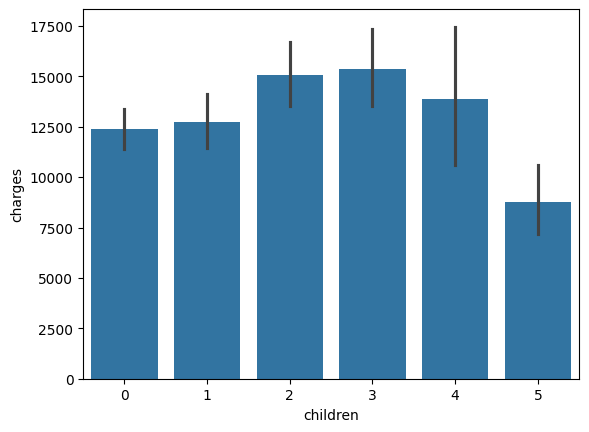

In [50]:
sns.barplot(x='children',y='charges',data=df)
plt.show()

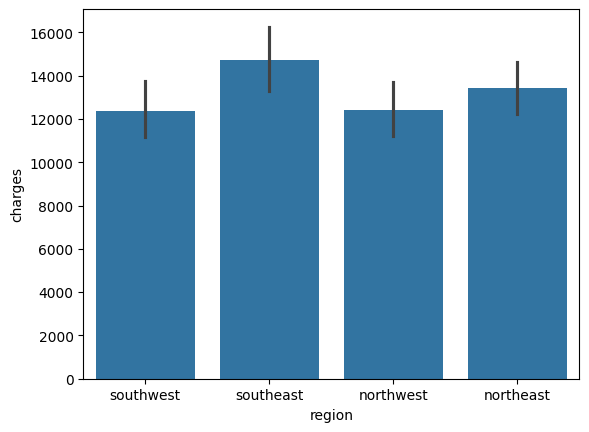

In [51]:
sns.barplot(x='region',y='charges',data=df)
plt.show()

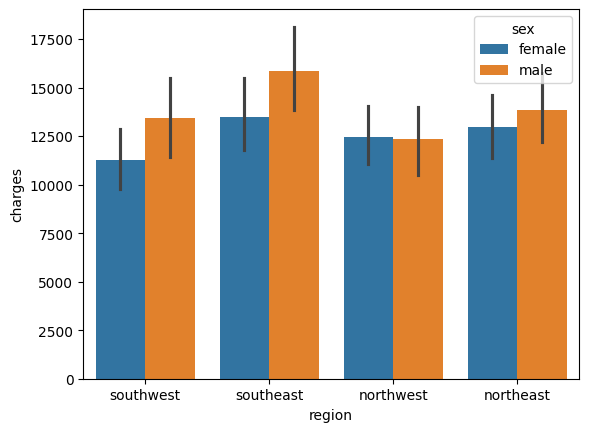

In [52]:
sns.barplot(x='region',y='charges',data=df,hue='sex')
plt.show()

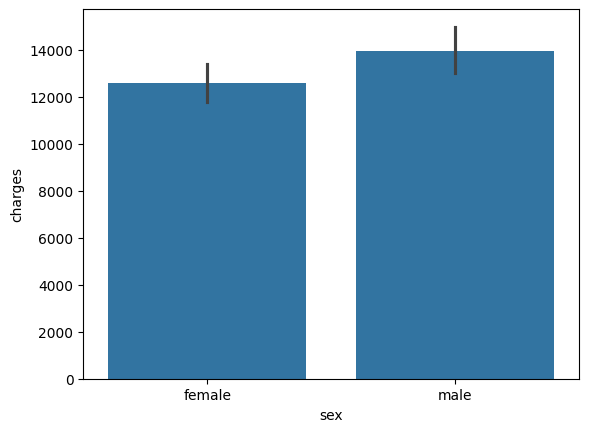

In [53]:
sns.barplot(x='sex',y='charges',data=df)
plt.show()

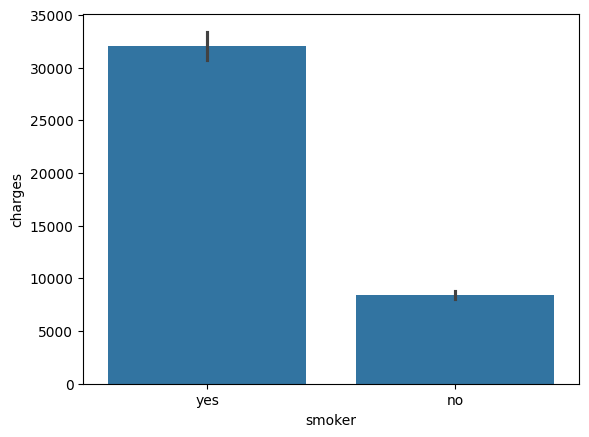

In [54]:
sns.barplot(x='smoker',y='charges',data=df)
plt.show()

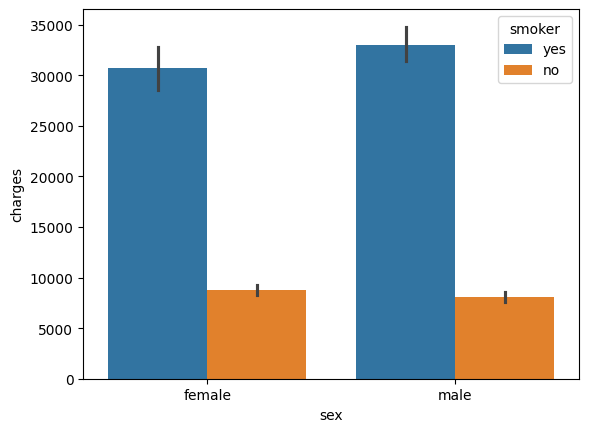

In [55]:
sns.barplot(x='sex',y='charges',data=df, hue='smoker')
plt.show()

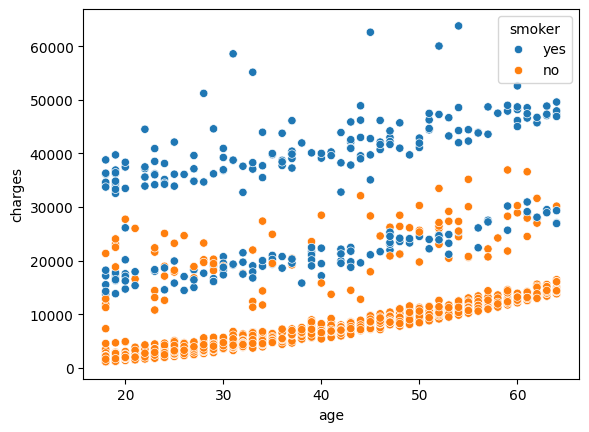

In [56]:
sns.scatterplot(x='age',y='charges',data=df, hue='smoker')
plt.show()

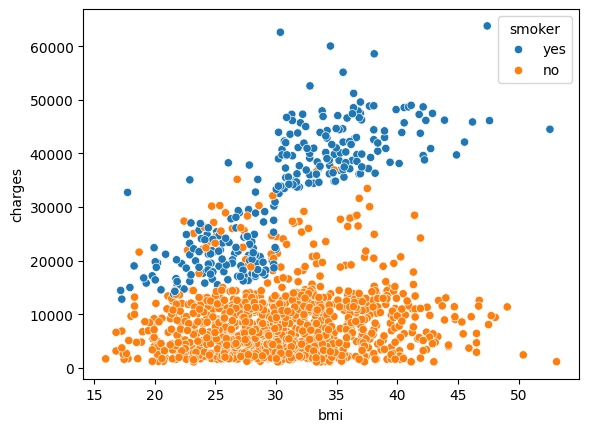

In [57]:
sns.scatterplot(x='bmi',y='charges',data=df, hue='smoker')
plt.show()

# Label Encoding

In [58]:
mapping_sex = {'female' : 0,
               'male' : 1}

mapping_smoker = {'no' : 0,
                  'yes' : 1}

mapping_region = {'southwest' : 0,
                  'southeast' : 1,
                  'northwest' : 2,
                  'northeast' : 3}

df['sex'] = df['sex'].map(mapping_sex)
df['smoker'] = df['smoker'].map(mapping_smoker)
df['region'] = df['region'].map(mapping_region)

In [59]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1010,48,0,22.80,0,0,0,8269.0440
710,18,1,35.20,1,0,1,1727.5400
350,57,0,23.18,0,0,2,11830.6072
500,29,1,34.40,0,1,0,36197.6990
121,18,1,23.75,0,0,3,1705.6245


# Modeling

In [60]:
X = df.drop(columns=['charges'])
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

## Linear Regression

In [63]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lrs = regressor.score(X_train, y_train)
print('Logistic Regression :', lrs)
print('Logistic Regression :', regressor.score(X_test, y_test))
eval_regression(regressor)


Logistic Regression : 0.7417049283233981
Logistic Regression : 0.7833463107364537
RMSE (test): 5799.587091438359
RMSE (train): 6105.789320191615
MAPE (test): 0.4709302952729579
MAPE (train): 0.4224687854025502
r2 (test): 0.7833463107364537
r2 (train): 0.7417049283233981
r2 (cross-val test): 0.7472559473580954
r2 (cross-val train): 0.7509206078064585


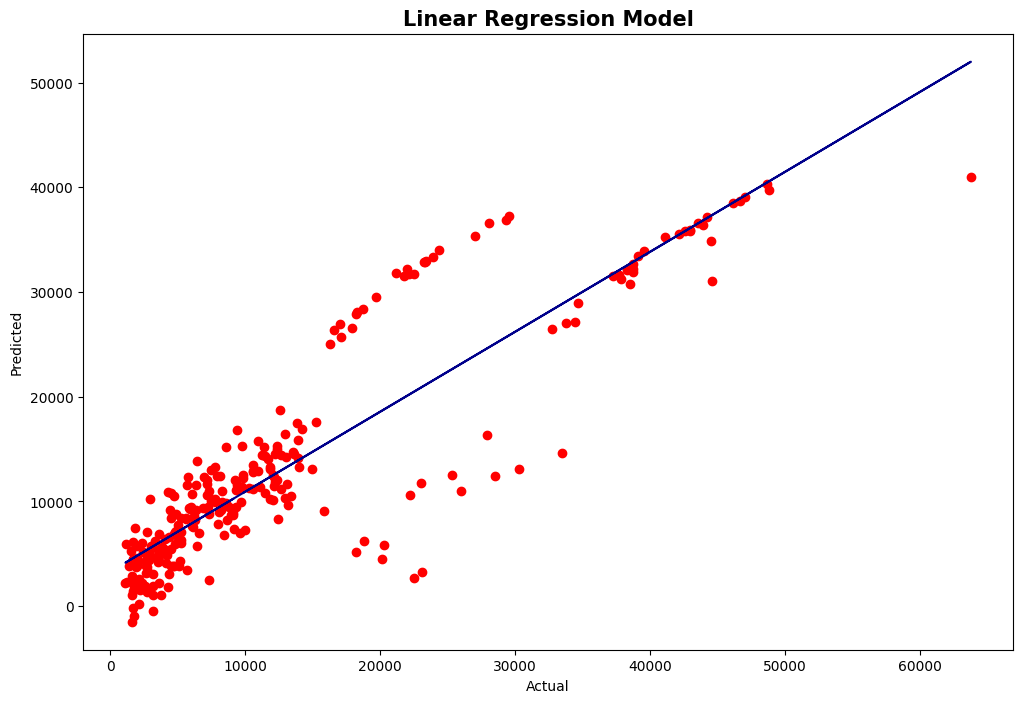

In [64]:
x = y_test
y = y_pred

plt.figure(figsize=(12,8))
plt.plot(x,y,'o',color='red')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, color='darkblue')
plt.title('Linear Regression Model', fontsize=15, fontweight='bold')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()